### Loading Data and Pre-processing

In [4]:
import pandas as pd
import re
from bertopic import BERTopic

# Loading the CSV file.
df = pd.read_csv('AI in Renwable energies.csv')

# Dropping rows with missing values
df.dropna(subset=['Abstract', 'Title', 'Year'], inplace=True)
df['Year'] = df['Year'].astype(int)

# Combining Title and Abstract
df['document'] = df['Title'] + ". " + df['Abstract']

df.head()

,Title,Year,Link,Affiliations,Abstract,document
0,Smart Cropping based on Predicted Solar Radiat...,2020,https://www.scopus.com/inward/record.uri?eid=2...,St. Thomas' College of Engineering and Technol...,Our world is developing very fast. This fast p...,Smart Cropping based on Predicted Solar Radiat...
1,Systematic literature review of photovoltaic o...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"Department of Energy Systems Engineering, Mani...",Since the harmful effects of climate warming o...,Systematic literature review of photovoltaic o...
2,Demystifying the use of era5-land and machine ...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"DRAMCO, Department of Electrical Engineering (...",Wind is a highly unstable renewable energy sou...,Demystifying the use of era5-land and machine ...
3,A CNN-Based Warning Information Preprocessing ...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"North China Electric Power University, School ...",The access of large-scale renewable energy and...,A CNN-Based Warning Information Preprocessing ...
4,Short-Term Photovoltaic Power Prediction Model...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"Northeastern University, College of Informatio...","In recent years, with the rapid expansion of t...",Short-Term Photovoltaic Power Prediction Model...


### Topic Modeling with BERTopic

In [5]:
!pip install hf_xet

In [6]:
# Initialize BERTopic model.
topic_model = BERTopic(nr_topics='auto', verbose=True)

# Fit the model to the documents.
topics, probabilities = topic_model.fit_transform(df['document'])

# Get the list of topics and their top words
topic_info = topic_model.get_topic_info()
print("Top 10 Topics Found:")
print(topic_info.head(11)) # We'll print 11 because -1 is the outlier topic

2025-08-04 09:35:51,615 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/178 [00:00<?, ?it/s]

2025-08-04 09:41:22,813 - BERTopic - Embedding - Completed ✓
2025-08-04 09:41:22,829 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-08-04 09:41:51,626 - BERTopic - Dimensionality - Completed ✓
2025-08-04 09:41:51,649 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-08-04 09:41:51,984 - BERTopic - Cluster - Completed ✓
2025-08-04 09:41:51,984 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-08-04 09:41:53,058 - BERTopic - Representation - Completed ✓
2025-08-04 09:41:53,058 - BERTopic - Topic reduction - Reducing number of topics
2025-08-04 09:41:53,106 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-08-04 09:41:54,055 - BERTopic - Representation - Completed ✓
2025-08-04 09:41:54,055 - BERTopic - Topic reduction - Reduced number of topics from 94 to 29


Top 10 Topics Found:
    Topic  Count                                    Name  \
0      -1   1814                        -1_the_of_and_to   
1       0   2731                         0_the_of_and_to   
2       1    444                 1_production_was_of_and   
3       2     93           2_turbine_wind_fault_turbines   
4       3     74                  3_biodiesel_oil_of_and   
5       4     56      4_development_energy_countries_the   
6       5     52  5_catalyst_hydrogen_catalysts_reaction   
7       6     49                    6_biomass_and_the_of   
8       7     41              7_battery_batteries_of_the   
9       8     37              8_turbine_blade_the_design   
10      9     33      9_materials_molecular_we_discovery   

                                       Representation  \
0   [the, of, and, to, in, energy, is, for, power,...   
1   [the, of, and, to, in, is, energy, power, for,...   
2   [production, was, of, and, biogas, the, methan...   
3   [turbine, wind, fault, tur

### Data Visualization

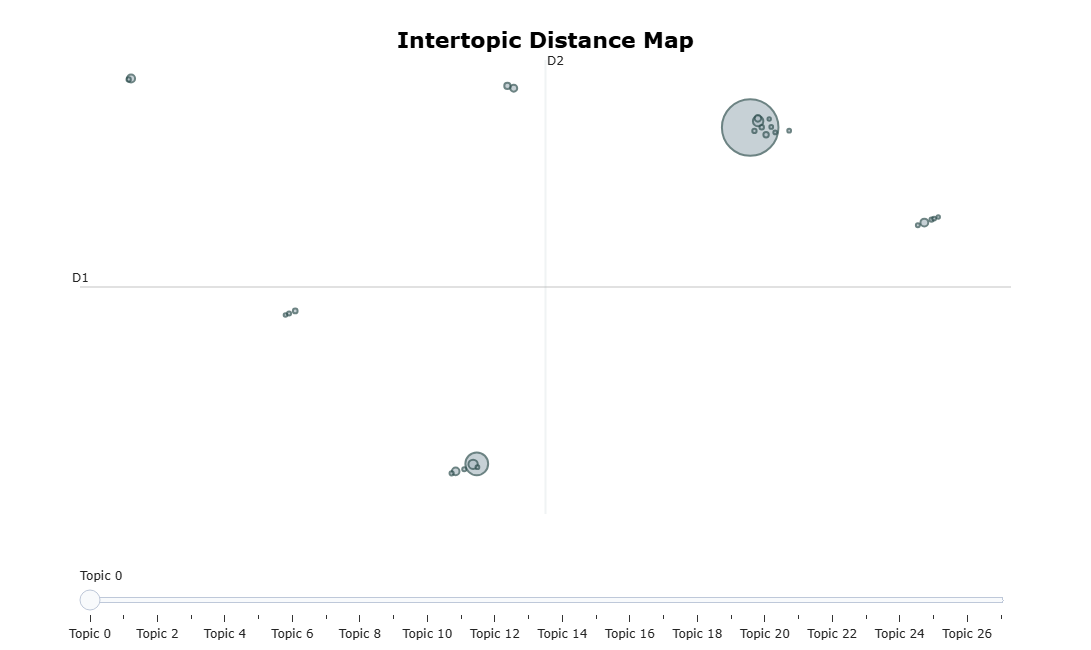

In [7]:
# Visualizing the relationships between topics
topic_model.visualize_topics()


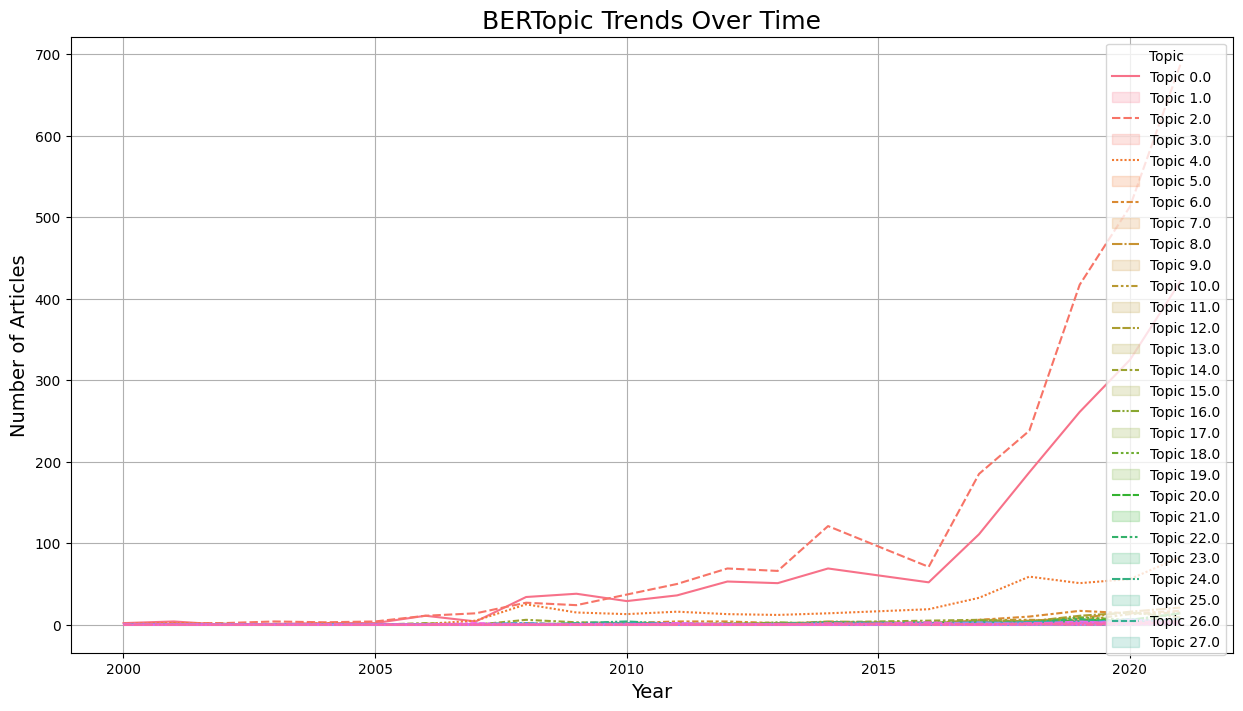

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

doc_info = topic_model.get_document_info(df['document'])

# We need to extract the topic number for each document
df['dominant_topic_bertopic'] = doc_info['Topic']

# Group by year and dominant topic to see trends
topic_trend = df.groupby(['Year', 'dominant_topic_bertopic']).size().unstack(fill_value=0)

# Plotting the topic trends over time
plt.figure(figsize=(15, 8))
sns.lineplot(data=topic_trend)
plt.title('BERTopic Trends Over Time', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
topic_labels = {idx: f'Topic {idx}' for idx in topic_trend.columns if idx != -1}
plt.legend(title='Topic', labels=topic_labels.values())
plt.grid(True)
plt.show();

### Results
**Merging Topics to Create Metatopics and Labeling Metatopics**

In [9]:
# 1. Analyzing top words per topic to identify candidates for merging
for topic_num in topic_model.get_topic_info().head(10)['Topic']:
    print(f"\nTopic {topic_num}:")
    print(topic_model.get_topic(topic_num))



Topic -1:
[('the', np.float64(0.02852905213620947)), ('of', np.float64(0.025364753365523258)), ('and', np.float64(0.023837289858833637)), ('to', np.float64(0.021446222577618895)), ('in', np.float64(0.02074813917937954)), ('energy', np.float64(0.01976776950090561)), ('is', np.float64(0.017552861568626055)), ('for', np.float64(0.01722622980180729)), ('power', np.float64(0.015622439016026635)), ('with', np.float64(0.013992808294728187))]

Topic 0:
[('the', np.float64(0.028579746344688246)), ('of', np.float64(0.023767266901160367)), ('and', np.float64(0.022870951863092317)), ('to', np.float64(0.021339558293569233)), ('in', np.float64(0.020225203944991964)), ('is', np.float64(0.019867836887743455)), ('energy', np.float64(0.019132434902672555)), ('power', np.float64(0.018626110105590492)), ('for', np.float64(0.017873053715300815)), ('wind', np.float64(0.015479051289738303))]

Topic 1:
[('production', np.float64(0.03428838359804859)), ('was', np.float64(0.030687622558861965)), ('of', np.floa

In [16]:
# 2. Manually defining topic groups that are semantically related

solar_group = [1, 4, 5, 8]                       # Topics related to Solar Energy
wind_group = [2, 6, 14]                          # Topics related to Wind Power
deep_learning_group = [3, 9, 12]                 # Topics on Deep Learning and AI Applications


In [ ]:
# 3. Merge topics using BERTopic's merge_topics function

topic_model = topic_model.merge_topics(df['document'], [1, 4, 5, 8])   # Solar Energy
topic_model = topic_model.merge_topics(df['document'], [2, 6, 14])    # Wind Power
topic_model = topic_model.merge_topics(df['document'], [3, 9, 12])    # Deep Learning

In [13]:
# 4. Review updated topics
print("\nUpdated Topic Info after Merging:")
print(topic_model.get_topic_info().head(10))



Updated Topic Info after Merging:


AttributeError: 'NoneType' object has no attribute 'get_topic_info'

In [14]:
# 5. Labelling the merged topics (for presentation/discussion)
custom_labels = {
    1: "Solar Energy Systems",
    2: "Wind Power Forecasting & Grid Integration",
    3: "Deep Learning in Energy Management",
    # Add or adjust based on your final topics
}

topic_model.set_topic_labels(custom_labels)


AttributeError: 'NoneType' object has no attribute 'set_topic_labels'

### Discussions

In [ ]:
# 6. Visualize topics with new labels (optional)
topic_model.visualize_topics()
topic_model.visualize_barchart(top_n_topics=10)

In [ ]:
# 1. Visualize updated topic clusters
fig_topics = topic_model.visualize_topics()
fig_topics.show()

# Exporting to HTML
fig_topics.write_html("topics_visualization.html")


In [ ]:
# 2. Visualize topic frequency (Top N topics)
fig_barchart = topic_model.visualize_barchart(top_n_topics=10)
fig_barchart.show()
fig_barchart.write_html("topic_barchart.html")


In [ ]:
# 3. Visualize topic hierarchy
fig_hierarchy = topic_model.visualize_hierarchy()
fig_hierarchy.show()
fig_hierarchy.write_html("topic_hierarchy.html")


In [ ]:
# 4. Visualize similarity matrix
fig_heatmap = topic_model.visualize_heatmap()
fig_heatmap.show()
fig_heatmap.write_html("topic_heatmap.html")


In [ ]:
# 5. Visualize topic evolution over time
df['Year'] = df['Year'].fillna(0).astype(int)

topics_over_time = topic_model.topics_over_time(documents, df['Year'])
fig_trends = topic_model.visualize_topics_over_time(topics_over_time)
fig_trends.show()
fig_trends.write_html("topic_trends_over_time.html")